# Обучение без учителя: кластеризация техники понижения размерности

## Введение в обучение без учителя. Базовая кластеризация

### Алгоритм K-MEANS

```python
#Импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

#Инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
#Обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
#Получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

#Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из df2, то мы просто воспользуемся методом predict
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

```

### Пример кластеризации на данных

In [59]:
#Импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
#Импортируем seaborn для визуализации
import seaborn as sns
#Импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

#Загружаем данные
df = pd.read_csv('data/pokemon.csv')
#Датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


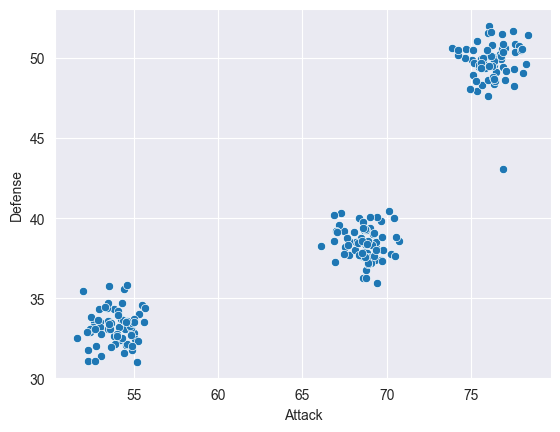

In [60]:
#Попробуем кластеризировать покемонов по силе атаки и уровню защиты
#Для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#Визуализируем матрицу X
sns.scatterplot(x=df.Attack, y=df.Defense);

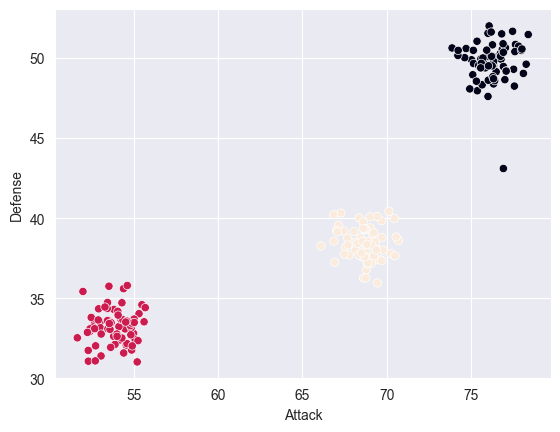

In [61]:
#Инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(
    #Количество кластеров
    n_clusters=3,
    #Стратегия кластеризации
    init='k-means++',
    #Количество запусков алгоритма k-means
    n_init=10,
    #Генератор случайных чисел
    random_state=42
)

#Запустим обучение модели
kmeans.fit(X)

#Предскажем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X)
#Eсли мы хотим получить метки класса для тех же данных, 
#на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

#Сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#Визуализируем результаты. Параметр 'с' принимает вектор с номерами классов для
# группировки объектов по цветам
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions);

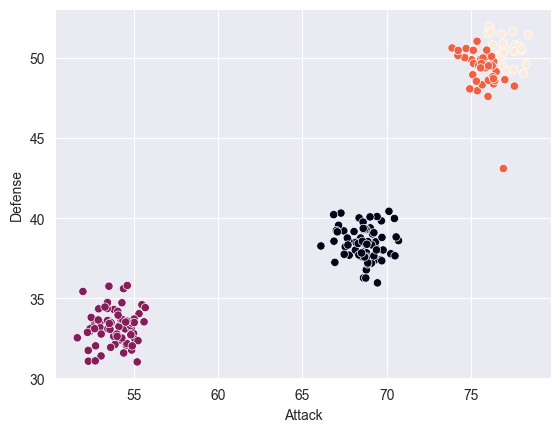

In [62]:
#Попробуем увеличить количество кластеров до 4

#Инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(
    #Количество кластеров
    n_clusters=4,
    #Стратегия кластеризации
    init='k-means++',
    #Количество запусков алгоритма k-means
    n_init=10,
    #Генератор случайных чисел
    random_state=42
)

#Запустим обучение модели
kmeans.fit(X)

#Предскажем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X)
#Eсли мы хотим получить метки класса для тех же данных, 
#на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

#Сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#Визуализируем результаты. Параметр 'с' принимает вектор с номерами классов для
# группировки объектов по цветам
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4);

In [63]:
#В трехмерном и другом n-мерном случае 
#кластеризация запускается следующим образом

#Добавляем третий признак - скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

#Инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(
    #Количество кластеров
    n_clusters=4,
    #Стратегия кластеризации
    init='k-means++',
    #Количество запусков алгоритма k-means
    n_init=10,
    #Генератор случайных чисел
    random_state=42
)

#Запускаем обучение модели 
kmeans.fit(X)

#Предсказываем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X)
#Если мы хотим получить метки класса для тех же данных, на 
#которых обучили модель, можно запросить labels
predictions = kmeans.labels_

### Метод локтя

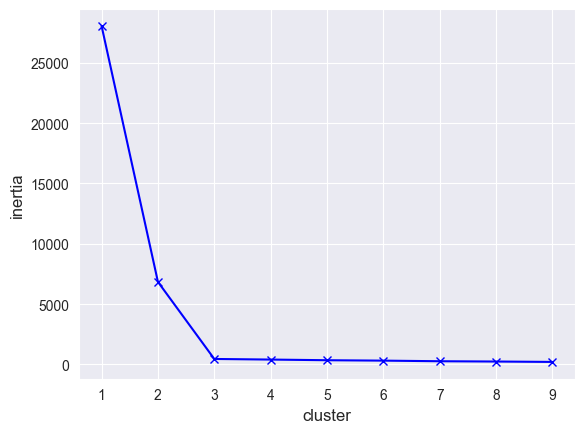

In [64]:
#Напишем функцию, которая будет принимать данные 
#и количество кластеров и возвращать значение инерции
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

X = df[['Attack', 'Defense']]

#Функция, кототорая принимает количество кластеров для k-means
#и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
    #Инициализируем алгоритм кластеризации
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    #Запускаем алгоритм k-means
    k_means.fit(X)
    #Находим значение инерции
    inertia = k_means.inertia_
    #Возвращаем значение инерции
    return inertia

#Создаем пустой список для значений инерции
inertia = []
#Итерируемся по разным размерам кластеров (от 1 до 9) и 
#сохраняем значение инерции для каждого кластера
for cluster_num in range(1,10):
    #Сохраняем значение
    inertia.append(get_inertia(cluster_num, X)) 

#Визуализируем, как менялась инерция в зависимости 
#от количества кластеров
#Задаем название осям x и y
plt.xlabel('cluster', fontsize = 12)
plt.ylabel('inertia', fontsize = 12)
#Рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

### Коэффициент силуэта

<Axes: xlabel='cluster', ylabel='silhouette'>

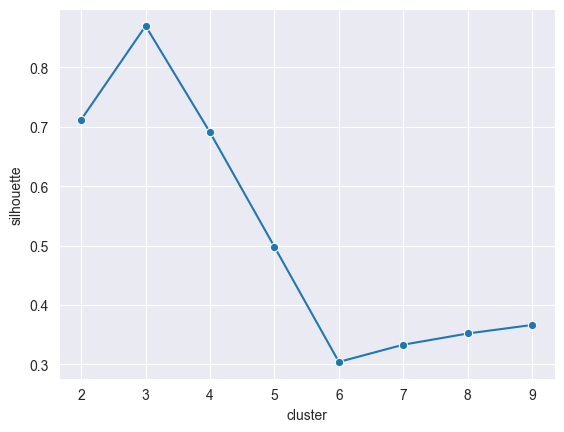

In [65]:
#Посчитаем силуэт, используя sklearn

#Импортируем метрику силуэта
from sklearn.metrics import silhouette_score

#Напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    #Подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

#Создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {'silhouette': [], 'cluster': []}

#Выберем нужные данные
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X))
    silhouette_res['cluster'].append(cluster_num)
    
#Сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

#Установим стиль для визуализации
sns.set_style('darkgrid')
#Визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x='cluster', y='silhouette', marker='o')

### Задание 2.7

Необходимо проанализировать данные, кластеризировать данные и, используя коэффициент силуэта, найти оптимальное количество кластеров.

In [66]:
#Импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
#Импортируем seaborn для визуализации
import seaborn as sns
#Импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

#Загружаем данные
df_2_7 = pd.read_csv('data/values_from_the_instrument.csv')
df_2_7.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<Axes: xlabel='cluster', ylabel='silhouette'>

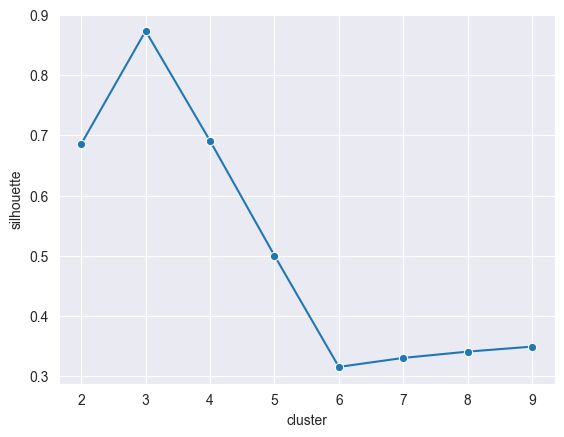

In [67]:
#Посчитаем силуэт, используя sklearn

#Импортируем метрику силуэта
from sklearn.metrics import silhouette_score

#Напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
    #Подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

#Создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {'silhouette': [], 'cluster': []}

#Выберем нужные данные
X = df_2_7

for cluster_num in range(2, 10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X))
    silhouette_res['cluster'].append(cluster_num)
    
#Сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

#Установим стиль для визуализации
sns.set_style('darkgrid')
#Визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x='cluster', y='silhouette', marker='o')

## Метрики

### Однородность кластеров

In [68]:
#Рассчитаем метрику однородности в sklearn

#Импортируем подсчет метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

#Передаем предсказанную информацию (к какому кластеру относятся 
#объекты датасета и правильные ответы)
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

1.0
1.0


In [70]:
#Рассмотрим метрику однородности на 
#примере результатов кластеризации покемонов.
#Рассмотрим два случая - с тремя и четырьмя кластерами

#Передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


### Полнота кластера

In [71]:
#Импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

#Передаем предсказанную информацию (к какому кластеру относятся 
#объекты датасета и правильные ответы)
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


In [72]:
#Рассмотрим метрику полноты на 
#примере результатов кластеризации покемонов.
#Рассмотрим два случая - с тремя и четырьмя кластерами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.8334191510029214


### V-мера (комбинация метрик полноты и однородности)

In [73]:
#Считаем V-меру для двух случаев кластеризации датасета с покемонами

#Импортируем из библиотеки sklearn подсчет V-меры
from sklearn.metrics import v_measure_score

#Подсчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9091419717602737


### Индекс Рэнда

Данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер

In [77]:
#Запустим подсчет индекса Рэнда в sklearn
from sklearn.metrics.cluster import rand_score
#Передаем в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

### Задание 3.3

In [81]:
print(round(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]), 2))

0.74


## Иерархическая кластеризация

### Задание 4.1

In [82]:
#Запустим иерархическую кластеризацию на датасете с покемонами

#Импортируем AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
#Создаем модель кластеризации
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
#Обучаем модель 
agglomerative_clustering.fit(X)
#Выводим предсказанные кластеры
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,